# CM50266 Applied Data Science
# Lab 2: Sentiment Analysis of Reviews

# Task 1 (6 marks)


In [1]:
%matplotlib inline
import numpy
import string
from nltk.stem import PorterStemmer
from sklearn import metrics
import seaborn as sns

porter = PorterStemmer()

# Removing all of the punctuation except apostrophes!
remove_punc = str.maketrans("!#$%&\()*+,-./:;<=>?@[\\]^_`{|}~", ' '*len("!#$%&\()*+,-./:;<=>?@[\\]^_`{|}~"))
remove_digits = str.maketrans(string.digits, ' '*len(string.digits))

The stop words that I will use are mostly the same as the ones in nltk.corpus although i went through and manually removed the words that include negation. These words have a significant value in terms of sentiment so excluding them will have a significant nagative impact in the performance.

In [2]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
             'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
             'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
             'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
             'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
             'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about','between', 
             'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
             'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
             'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
             'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
             't', 'can', 'will', 'just', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y','ma', 'shan']

In [3]:
def reviewsReader(file):
    """Reads the csv file and retrieves a numpy matrix with shape (1382, 2) that contains each car review
       with its Sentiment and Comment. Each comment will be filtered from punctuations, digits and any word that is
       shorter than a length of 2 characters. Additionally words will be stemmed to remove minor variations between them
    """
    with open(file, 'r') as dataFile:
        header = dataFile.readline()
        
        reviews = []
        removedWords = []
        stemmedWords = {}
        
        # Iterate through each line of the csv file
        for line in dataFile.readlines():
            
            sentiment = line.strip().split(',')[0].lower()
            
            comment = line.strip().split(',')[1].lower()
            
            # Removes punctuation and digits from the review
            comment = comment.translate(remove_punc)
            comment = comment.translate(remove_digits)

            filteredComment = ''

            # Filters stop words and discards small length words
            # Also stemming them to clear minor variations
            for word in comment.split():
                
                if word not in stop_words and len(word) > 2:
                    
                    stem = porter.stem(word)
                    
                    # Checking if word can be stemmed and storing unique instances in list
                    if word != stem and stem not in stemmedWords:
                        if stem in stemmedWords:
                            stemmedWords[stem].append(word)
                        else:
                            stemmedWords[stem] = [word]
                        
                    filteredComment += stem + ' '
                
                # Adds stop words that were found in the reviews in a list
                elif word not in removedWords:
                    removedWords.append(word)
            
            reviews.append([sentiment, filteredComment])
            
            
    print('Punctuation and digits have been removed and every character was lowecased\n')
    print('These words have been removed from the reviews as they are unlikely to affect sentiment \n\n', removedWords)
    print('\nStemming has been applied to clear minor variatons between words')
    print('Demonstrating 5 randomly chosen stems found from a total of', len(stemmedWords.keys()))
    print()
    stemmedChoices = numpy.random.choice(list(stemmedWords.keys()), 5)

    for choice in stemmedChoices:
        print(', '.join([str(elem) for elem in stemmedWords[choice]]), '--->', choice)
    
    # Convert the nested lists into a numpy matrix    
    arrayReviews = numpy.array(reviews)
    
    return arrayReviews

arrayReviews = reviewsReader('car_reviews.csv')

Punctuation and digits have been removed and every character was lowecased

These words have been removed from the reviews as they are unlikely to affect sentiment 

 ['in', 'we', 'a', 'and', 'it', 'so', 'to', 'i', 'did', 'for', 'the', 'of', 'but', 'do', 'as', 'our', 'other', 'is', 'up', 'out', 'further', 'than', 'that', 'your', 'from', 'has', 'you', 'can', 'at', 'all', 'very', 'if', 'had', 'over', 'have', 'my', 'was', 'be', 'myself', 'now', 'me', 'us', 'there', 'with', 'no', 'such', 'an', 'both', 'am', 'into', 'most', 'any', 'who', 'on', 'this', 'about', 'how', 'being', 'been', 'does', 'are', 'or', 'same', 'f', 'were', 'when', 'he', 'off', 'because', 'just', 'again', 'after', 'which', 'some', 'too', 'then', 'where', 'once', 'their', 'by', 'k', 'during', 'its', 'l', 'x', 'w', 'c', 'above', 'under', 'will', 'only', 'while', 'im', 'they', 'whom', 'sx', 'these', 'them', 'down', 'each', 'go', 'those', 'having', 'more', 'gl', 'until', 'few', 'what', 'itself', 'id', 'through', 'll', 've', 'v

# Data Splitting
Splitting the total reviews into 80% training data and 20% testing data

In [4]:
def dataSplitting(arrayReviews):

    split = round(arrayReviews.shape[0] * 0.8)

    # Shuffles the matrix 3 times to get the training and test with a random order
    numpy.random.shuffle(arrayReviews)
    numpy.random.shuffle(arrayReviews)
    numpy.random.shuffle(arrayReviews)

    # Splitting using slices
    # x holds the comments, y holds the sentiments
    train = arrayReviews[:split,:]
    x_train = train[:, 1]
    y_train = train[:, 0]

    test = arrayReviews[split:,:]
    x_test = test[:, 1]
    y_test = test[:, 0]

    return x_train, y_train, x_test, y_test
    
x_train, y_train, x_test, y_test = dataSplitting(arrayReviews)
    
print('Train Data', x_train.shape, y_train.shape)
print('Test Data', x_test.shape, y_test.shape)

Train Data (1106,) (1106,)
Test Data (276,) (276,)


# Dictionary Creation

Iterating through each comment of the reviews in the Training set and storing each unique word found creating a dictionary

I am avoiding issues of 'Leakage' since I will only be using the unique words found in the train set alone for vector creation

In [5]:
trainUniqueWords = []

for comment in x_train:
    
    words = numpy.unique(comment.split())
        
    for word in words:
        
        # Storing the unique words found in the train set in a list
        if word not in trainUniqueWords:
            trainUniqueWords.append(word)
            
print('Only the unique words that were found in the train set will be used to create the vectors')
print(len(trainUniqueWords))

Only the unique words that were found in the train set will be used to create the vectors
8963


# Bag of Words Model

Iterating through each comment of the reviews in the Training set and storing in a list of lists the unique words in each review.

Applying the same method for the Test set

In [6]:
trainBOWList = []

for comment in x_train:
    
    commentBOW = []
    words = numpy.unique(comment.split())
        
    for word in words:
        
        # Storing the unique words found in comment of the review
        if word not in commentBOW:
            commentBOW.append(word)
    
    trainBOWList.append(commentBOW)

# -----------------------------------------

testBOWList = []

for comment in x_test:
    
    commentBOW = []
    words = numpy.unique(comment.split())
        
    for word in words:
        
        # Storing the unique words found in comment of the review
        if word not in commentBOW:
            commentBOW.append(word)
    
    testBOWList.append(commentBOW)
    
print(len(trainBOWList), len(testBOWList))

1106 276


# Vector Creation using Binary Representation

Again noting I am avoiding <b>Leakage</b> by using only the dictionary of words that were found in the train set to create the vectors

In [7]:
trainVectors = []

# Iterating through each list of unique words in the review for the train set
for commentBow in trainBOWList:
    
    # Each comment vector will at the end have a length the same as the number of words in the dictionary
    # Represented by 1 when word is present in a review and 0 otherwise
    commentVec = []
    
    for word in trainUniqueWords:
        if word in commentBow:
            commentVec.append(1)
        else:
            commentVec.append(0)
    
    trainVectors.append(commentVec)

# Converting list to numpy array
vec_train = numpy.array(trainVectors)

# -----------------------------------------------
testVectors = []

# Iterating through each list of unique words in the review for the test set
for commentBow in testBOWList:
    
    # Each comment vector will at the end have a length the same as the number of words in the dictionary
    # Represented by 1 when word is present in a review and 0 otherwise
    commentVec = []
    
    for word in trainUniqueWords:
        if word in commentBow:
            commentVec.append(1)
        else:
            commentVec.append(0)
    
    testVectors.append(commentVec)
    

print('Vectors have been created for each review only the unique words found in the train data')
print('We do not care about words in the Test data as they are never taken into account when creating the vectors!')
print('Each element in the vector is represented by a binary indication of a words appearance in the review')
print('I will print the vectors for the first 2 reviews in the test set')
print(testVectors[0:2])

# Converting list to numpy array
vec_test = numpy.array(testVectors)

Vectors have been created for each review only the unique words found in the train data
We do not care about words in the Test data as they are never taken into account when creating the vectors!
Each element in the vector is represented by a binary indication of a words appearance in the review
I will print the vectors for the first 2 reviews in the test set
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

# Naive Bayes classifier for multivariate Bernoulli models

Reference: https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

In [8]:
from sklearn.naive_bayes import BernoulliNB

nb_bernoulli = BernoulliNB()

# Training model using Train data
nb_bernoulli.fit(vec_train, y_train)

# Testing using Test data
bernou_y_predictions = nb_bernoulli.predict(vec_test)

# Measuring accuracy
bernou_accuracy =  metrics.accuracy_score(y_test, bernou_y_predictions)
print('Accuracy: {}%'.format(round(bernou_accuracy*100, 2)))

Accuracy: 72.46%


Bernoulli Confusion Matrix
TN | FP
-------
FN | TP

True Negatives: 84
False Positives: 59
False Negatives: 17
True Positives: 116


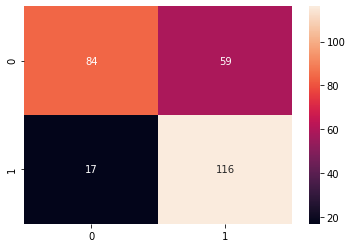

In [9]:
# Confusion matrix
bernou_confusionMatrix = metrics.confusion_matrix(y_test, bernou_y_predictions)
print('Bernoulli Confusion Matrix')
print('TN | FP')
print('-------')
print('FN | TP')
print()
sns.heatmap(bernou_confusionMatrix, annot=True, fmt='g')
print('True Negatives:', bernou_confusionMatrix[0][0])
print('False Positives:', bernou_confusionMatrix[0][1])
print('False Negatives:', bernou_confusionMatrix[1][0])
print('True Positives:', bernou_confusionMatrix[1][1])

Bernoulli Confusion Matrix Proportions


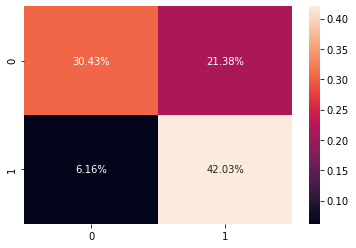

In [10]:
print('Bernoulli Confusion Matrix Proportions')
bernou_confusionMatrixProps = bernou_confusionMatrix / len(y_test)
sns.heatmap(bernou_confusionMatrixProps, annot=True, fmt='.2%')

# Task 2

For Task 2 my approach on improving the accuracy on the predictions of the naive bayes model is to change it from the Bernoulli classifier to a multinomial model which is observed to perform better at larger vocabulary sizes. The vocabulary of words which I have created from the unique words in the Training Set has an average size close to 8800. As shown in (Figure 5) on the paper that I have attached, as the vocabulary size increases the performance of multi-variate Bernoulli significantly decreases whereas the multinomial stays relatively the same.

Additionally, as described in the attached paper, the multinomial model uses the word frequency in vector creation instead of a binary representation (p. 3 'Multinomal Model'). A method to implement this to my previous code is to instead of just storing the unique words found in each review, I should also keep the frequency of the words presence in the review.

When creating the vectors instead of representing the word in binary format, I will insert the frequency of the word for that specific review.

<b>Reference:</b>

A. McCallum, K. Nigam, et al., 'A Comparison of Event Models for Naive Bayes Text Classification', Retrieved 20 Nov 2020, From http://www.cs.cmu.edu/~knigam/papers/multinomial-aaaiws98.pdf

# Bag of Words Model with Count

Applying the same method as before but now I am storing a list of dictionaries which have the unique words in each review as a key with their count as the value.

In [11]:
trainBOWList = []

for comment in x_train:
    
    commentBOW = {}
    words, counts = numpy.unique(comment.split(), return_counts=True)
    
    # Iterating through each word and storing the word with its corresponding count in the dictionary
    for i in range(len(words)):

        commentBOW[words[i]] = counts[i]
    
    # Storing the dictionary in a list
    trainBOWList.append(commentBOW)

# -----------------------------------------

testBOWList = []

for comment in x_test:
    
    commentBOW = {}
    words, counts = numpy.unique(comment.split(), return_counts=True)
        
    # Iterating through each word and storing the word with its corresponding count in the dictionary
    for i in range(len(words)):

        commentBOW[words[i]] = counts[i]
    
    # Storing the dictionary in a list
    testBOWList.append(commentBOW)
    
print(len(trainBOWList), len(testBOWList))

1106 276


# Vector Creation using Count Representation

Instead of adding either a 0 if it word does not exist in the review and a 1 if it does. I will not add its count if the word is present in the review.

In [12]:
trainVectors = []

for commentBow in trainBOWList:

    commentVec = []
    
    for word in trainUniqueWords:
        if word in commentBow:
            # Changings this from append(1) to now append the count
            commentVec.append(commentBow[word])
        else:
            commentVec.append(0)
    
    trainVectors.append(commentVec)

vec_train = numpy.array(trainVectors)

# -----------------------------------------------
testVectors = []

for commentBow in testBOWList:
    
    commentVec = []
    
    for word in trainUniqueWords:
        if word in commentBow:
            # Changings this from append(1) to now append the count
            commentVec.append(commentBow[word])
        else:
            commentVec.append(0)
    
    testVectors.append(commentVec)

print('Now the vector contains the word frequency for the different word in a review')
print('An example is this first vector of the test set')
print(testVectors[0])

# Converting list to numpy array
vec_test = numpy.array(testVectors)

Now the vector contains the word frequency for the different word in a review
An example is this first vector of the test set
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Bernoulli to Multinomial

Changing the supervised learning method to Multinomal Naive Bayes instead of Bernoulli Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

# Instead of using the BernoulliNB model we will use the Multinomial model
# I changed this line from the Task 1 to use the same vectors as before just using the different classifier
nb_multinomial = MultinomialNB()

nb_multinomial.fit(vec_train, y_train)

multi_y_predictions = nb_multinomial.predict(vec_test)

multi_accuracy =  metrics.accuracy_score(y_test, multi_y_predictions)
print('Accuracy: {}%'.format(round(multi_accuracy*100, 2)))

Accuracy: 81.52%


Multinomial Confusion Matrix, for the "improved" Task 2 approach
TN | FP
-------
FN | TP

True Negatives: 114
False Positives: 29
False Negatives: 22
True Positives: 111


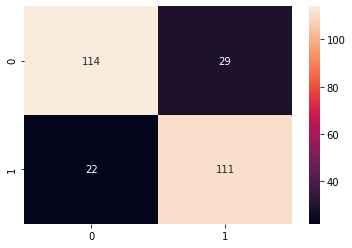

In [14]:
# Confusion matrix
multi_confusionMatrix = metrics.confusion_matrix(y_test, multi_y_predictions)
print('Multinomial Confusion Matrix, for the "improved" Task 2 approach')
print('TN | FP')
print('-------')
print('FN | TP')
print()
sns.heatmap(multi_confusionMatrix, annot=True, fmt='g')
print('True Negatives:', multi_confusionMatrix[0][0])
print('False Positives:', multi_confusionMatrix[0][1])
print('False Negatives:', multi_confusionMatrix[1][0])
print('True Positives:', multi_confusionMatrix[1][1])

# Evaluating

In [15]:
# Getting the differences
difference_confusionMatrix = multi_confusionMatrix - bernou_confusionMatrix

# Finding the percentage change
percent_change_confussion = numpy.around(difference_confusionMatrix / bernou_confusionMatrix * 100, decimals=2)

# Checking if there was an increase or decrease
change_confussion = percent_change_confussion.astype(str)
for row in range(2):
    for element in range(2):
        if float(change_confussion[row][element]) > 0:
            change_confussion[row][element] = 'increase'
        elif float(change_confussion[row][element]) < 0:
            change_confussion[row][element] = 'decrease'
        else:
            change_confussion[row][element] = 'no change'


print('From then results of the Bernoulli Model when compared to the "improved" Multinomial model, we observe')
            
print('True Negatives: {}% {}'.format(abs(percent_change_confussion[0][0]), change_confussion[0][0]))
print('False Positives: {}% {}'.format(abs(percent_change_confussion[0][1]), change_confussion[0][1]))
print('False Negatives: {}% {}'.format(abs(percent_change_confussion[1][0]), change_confussion[1][0]))
print('True Positives: {}% {}'.format(abs(percent_change_confussion[1][1]), change_confussion[1][1]))

print()

print('Accuracy Improvement of {}%'.format(round((multi_accuracy-bernou_accuracy)/bernou_accuracy*100, 2)))

From then results of the Bernoulli Model when compared to the "improved" Multinomial model, we observe
True Negatives: 35.71% increase
False Positives: 50.85% decrease
False Negatives: 29.41% increase
True Positives: 4.31% decrease

Accuracy Improvement of 12.5%


# Comparing Performance

From my own observations I saw a noteworthy improvement in accuracy (Avg: +4%) on the Multinomial Model with an impressive increase in True Negatives and a significant decrease in False Positives.

As the multinomial model took advantage of the frequency of the words for the vector representation, and by using a large vocabulary of close to 8800 words, the observed model has proved that the expected improvements have been made and the goal of the task was succesfully achieved!